In [1]:
import json
import gzip
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [2]:
path_study_results = Path("/eos/user/l/lpauwels/Simulations/MomentumAcceptance/IntensityScan/study_results")

In [3]:
name_files = [p.name for p in path_study_results.iterdir()]

In [6]:
data = {'linear' : {}, 'errors': {}}

In [7]:
def df_to_delta(df):
    slip_factor = 0.0017935055033301713
    f = 200_000_000
    return 1/slip_factor * df/f

In [25]:
sweep_per_turn = 1.0
data = {'linear' : {}, 'errors': {}}
for name_file in name_files:
    with gzip.open(path_study_results / name_file, "rt") as f:
        study_results = json.load(f)

    line_type = name_file.split("_")[1]
    chroma = float(name_file.split("_")[2].split(".json")[0])
    print(line_type, chroma)
    if chroma not in data[line_type]:
        data[line_type][chroma] = {}
    
    for plane in list(study_results.keys()):
        assert abs(study_results[plane]['sweep_per_turn']) == sweep_per_turn
        turns, counts = np.unique(study_results[plane]['at_turn'], return_counts=True)
        data[line_type][chroma][plane] = {'turns' : turns, 'counts' : counts}


errors 0.5
errors 0.7
errors 1.0
linear 0.5
linear 0.7
linear 1.0


In [23]:
name_files[0].split("_")[2].split('json')

['0.5.', '.gzip']

In [18]:
name_file.split("_")[2].split(".")[0]

'1'

In [17]:
data['linear']

{0.0: {'DPneg': {'turns': array([1584, 1606, 1612, 1621, 1625, 1627, 1631, 1647, 1652, 1655, 1656,
          1662, 1663, 1664, 1666, 1670, 1675, 1682, 1683, 1686, 1688, 1689,
          1693, 1696, 1699, 1701, 1702, 1703, 1704, 1711, 1712, 1713, 1714,
          1719, 1720, 1723, 1724, 1727, 1729, 1730, 1735, 1736, 1740, 1741,
          1743, 1745, 1748, 1752, 1754, 1757, 1759, 1761, 1763, 1767, 1768,
          1770, 1771, 1774, 1775, 1777, 1779, 1780, 1783, 1784, 1787, 1791,
          1792, 1793, 1795, 1796, 1798, 1799, 1800, 1802, 1803, 1804, 1806,
          1807, 1810, 1811, 1812, 1814, 1815, 1816, 1819, 1820, 1821, 1824,
          1826, 1827, 1828, 1829, 1830, 1831, 1832, 1834, 1836, 1837, 1839,
          1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1849, 1850, 1851,
          1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
          1864, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876,
          1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1

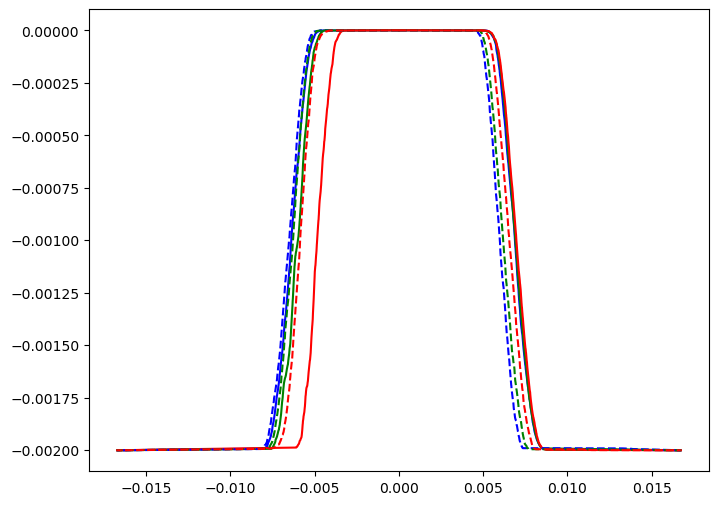

In [42]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
num_particles = 2000*500
colors = {0.5 : 'blue', 0.7 : 'green', 1.0 : 'red'}
line_styles = {'linear' : '-', 'errors' : '--'}

for line_type in ['linear', 'errors']:
    for chroma in sorted(data[line_type].keys()):
        for plane in ['DPpos', 'DPneg']:
            turns=data[line_type][chroma][plane]['turns']
            counts=data[line_type][chroma][plane]['counts']
            turns = np.concatenate(([0], turns))
            counts =  np.concatenate(([num_particles], counts))
            deltas = df_to_delta(turns * sweep_per_turn)
            if plane == 'DPneg':
                deltas = -deltas
            ax.plot(deltas, 1-np.cumsum(counts)/num_particles, color=colors[chroma], linestyle=line_styles[line_type], label = f'{chroma}')

In [ ]:
flatten

AttributeError: 'list' object has no attribute 'flatten'